<a href="https://colab.research.google.com/github/Theonimfi/Text-mining/blob/main/Evaluation_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python3 -m spacy download en_core_web_lg

2022-10-17 13:16:51.956845: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 9.3 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def has_relevant_relationships(doc , list_of_words):
    # people = []
    # for entity in doc.ents:
    #     if entity.label_ == 'PERSON' and entity.text not in people:
    #         people.append(entity.text)
    #     if len(people)>1:
    for sent in doc.sents:
      if any(ele in str(sent).lower() for ele in list_of_words):
        return True
    return False

In [27]:
import os
import json
import pandas as pd 
import spacy
from spacy import displacy
from itertools import *
import datetime
import joblib
directory = '/content/drive/MyDrive/Data Science and AI/Text mining_Shared/enwiki20220701-stripped/random/'
# Uncomment the bellow to get the final docs

# spacy.require_gpu()
# counter = 0
# keep_docs = []
# nlp = spacy.load('en_core_web_lg')
# list_of_words = ['relative', 'mother',  'father', 'born by', 'parent', 'sister', 'brother', 'sibling', 'employer', 'spouse', 'married to','husband', 'wife', 'cousin', 'boss']

# directory = '/content/drive/MyDrive/Data Science and AI/Text mining_Shared/enwiki20220701-stripped/random/'

# for filename in os.listdir(directory):
#   if 'wiki' in filename:
#     file = open(directory+filename, 'r')
#     Lines = file.readlines()
#     content = []
#     # Strips the newline character
#     for line in Lines:
#         content.append(json.loads(line.split('\n')[0]))
#     # Add data to a pandas dataframe
#     df = pd.DataFrame(content)
#     # Keep only rows with non empty text
#     df = df[df.text != '']
#     df = df[df.text.str.len() <= 500]

#     # Reindexing
#     df.index = range(len(df))
#     print("Start", filename)
#     print("Count initial", len(df))

#     titles = df.title.tolist() 
#     for i in range(len(titles)):
#         doc = nlp(titles[i])
#         person_found = False
#         for ent in doc.ents:
#             if ent.label_=='PERSON':
#               person_found = True
#         if not person_found:
#           df = df.drop([i])
#     df.index = range(len(df))
#     print("Count final", len(df))
      
#     # Calculate time spend
#     start = datetime.datetime.now()
#     counter = 0
#     # Save in a list all the documents that contain more than one person
#     for textt in df.text:
#       counter +=1
#       if counter % 1000 == 0:
#         end = datetime.datetime.now()
#         print("We are in ", counter, "out of ", len(df.text))
#         print("Keep docs length is", len(keep_docs))
#         print("Took:", (end-start), "time")
#       doc = nlp(textt)
#       hrr = has_relevant_relationships(doc, list_of_words)
#       if hrr:
#         keep_docs.append(doc)

# joblib.dump(all_docs, '/content/drive/MyDrive/Data Science and AI/Text mining_Shared/enwiki20220701-stripped/random/Saved_docs')

In [5]:
keep_docs = joblib.load('/content/drive/MyDrive/Data Science and AI/Text mining_Shared/enwiki20220701-stripped/random/Saved_docs')

In [6]:
len(keep_docs)

872

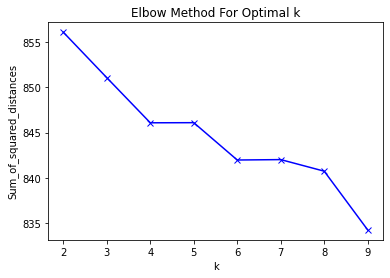

How many clusters do you want to use?
4
Top terms per cluster:
Cluster 0:
 olympics
 born
 competed
 summer
 brother
 event
 father
 won
 medal
 wife
Cluster 1:
 football
 played
 professional
 russian
 player
 footballer
 league
 fc
 born
 club
Cluster 2:
 member
 politician
 known
 minister
 assembly
 died
 state
 legislative
 indian
 father
Cluster 3:
 film
 actor
 actress
 television
 born
 american
 films
 married
 known
 role
                                                 title  cluster
1    Gregorio Fontana, born Giovanni Battista Loren...        0
3    Chantal Beltman (born 25 August 1976 in Slagha...        0
4    Rowan Moore is an architecture critic. He is t...        0
5    Cantalpino is a village and municipality in th...        0
6    Jimmy Gardner (December 25, 1885 in Lisdoonvar...        0
..                                                 ...      ...
859  Thomas Kefford (baptised 18 March 1686, in Roy...        0
864  Hitman's Run is a 1999 film directed by Mark L.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

documents = [str(i) for i in keep_docs]

def cluster_text(text):
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(text)

    Sum_of_squared_distances = []
    K = range(2,10)
    for k in K:
       km = KMeans(n_clusters=k, max_iter=200, n_init=1)
       km = km.fit(X)
       Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

    print('How many clusters do you want to use?')
    true_k = int(input())
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=1)
    model.fit(X)

    print("Top terms per cluster:")
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" % i),
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind])

    labels=model.labels_
    clusters=pd.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
    #print(clusters.sort_values(by=['cluster']))

    for i in range(true_k):
        print(clusters[clusters['cluster'] == i])
        
    return clusters
clusters = cluster_text(documents)

In [16]:
clusters

,title,cluster
0,Borislav Hazurov (; born 4 October 1985) is a ...,1
1,"Gregorio Fontana, born Giovanni Battista Loren...",0
2,Davy Oyen (born 17 July 1975) is a Belgian for...,1
3,Chantal Beltman (born 25 August 1976 in Slagha...,0
4,Rowan Moore is an architecture critic. He is t...,0
...,...,...
867,George Douglas Liddell Sommerville (21 Decembe...,3
868,Gustav Alexander (1873 – 12 April 1932) was an...,0
869,Veth Rathana (born 1986) was a Cambodian actre...,0
870,Sumana Das Goradia is an Indian television act...,3


In [17]:
new_docs = clusters.groupby("cluster").sample(n=20, random_state=1)

In [18]:
new_docs

,title,cluster
176,Lidia Chojecka-Leandro (born 25 January 1977 i...,0
387,"Nubkhesbed (""Gold and Lapis lazuli"") was an an...",0
773,Gustavo Selbach (born 25 August 1974 in Três C...,0
280,"The Friedland was an 80-gun ""Bucentaure""-class...",0
829,Sergey Shayslamov (born 23 July 1970) is an Uz...,0
...,...,...
238,George Besson (25 December 1882 – 19 June 1971...,3
600,Hippolyte Girardot (born Frédéric Girardot; 10...,3
502,Craig Conway is an English actor. Conway has a...,3
136,"Simone Spoladore (born October 29, 1979) is a ...",3


In [35]:
# cd 'drive/MyDrive/Data Science and AI/Text mining_Shared/enwiki20220701-stripped/random'

/content/drive/MyDrive/Data Science and AI/Text mining_Shared/enwiki20220701-stripped/random


In [36]:
# Ucomment the bellow if file with selected docs does not exist

# from google.colab import auth
# auth.authenticate_user()

# import gspread
# from google.auth import default
# creds, _ = default()
# from gspread_dataframe import set_with_dataframe
# from google.colab import drive


# gc = gspread.authorize(creds)
# title = 'Random docs'
# gc.create(title)  # if not exist
# sheet = gc.open(title).sheet1
# set_with_dataframe(sheet, new_docs) 